    Jacob Knopping
    2/25/2020
    
    26.4 Assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings("ignore")

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [3]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [4]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

__1) Produce dendrograms for the heart disease dataset using three different linkage methods: complete, average and ward. Which linkage method do you think produces more reasonable result?__

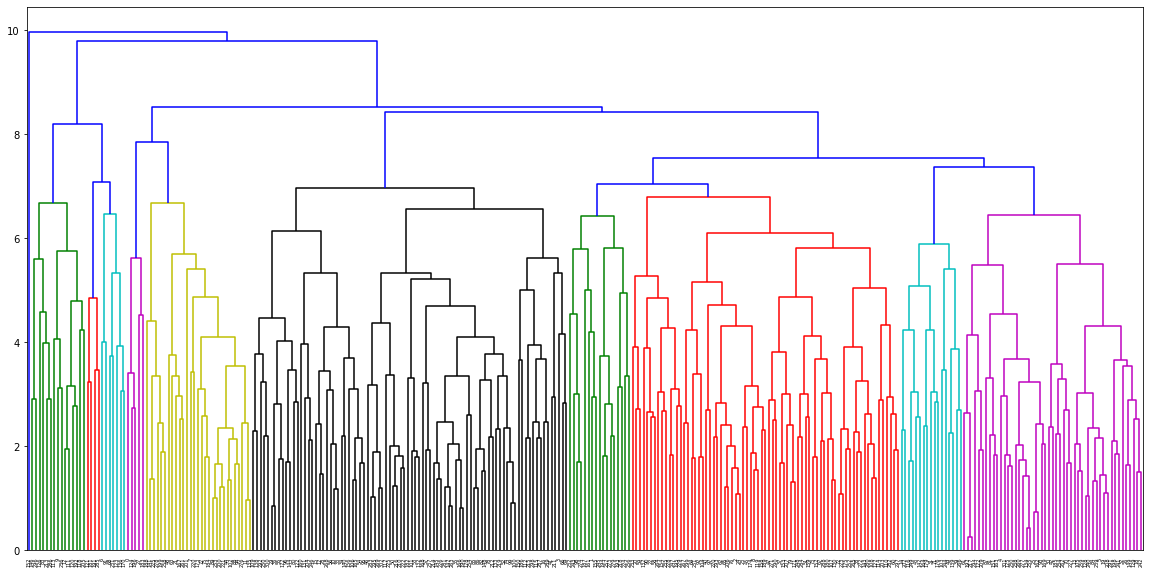

In [5]:
# Dendrogram with 'complete' linkage method
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='complete'))
plt.show()

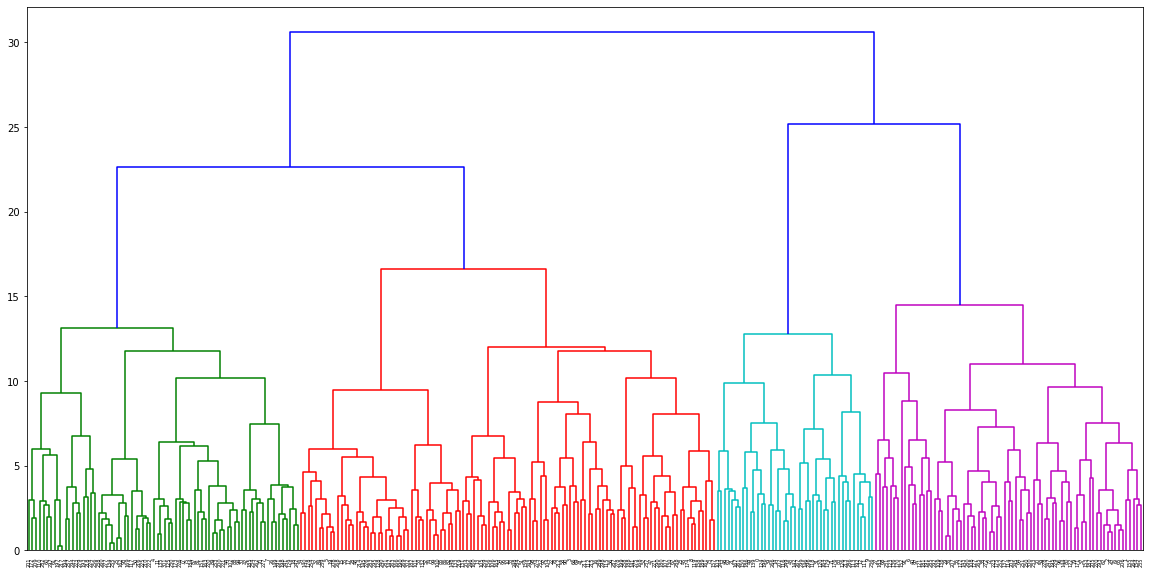

In [6]:
# Dendrogram with 'ward' linkage method
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='ward'))
plt.show()

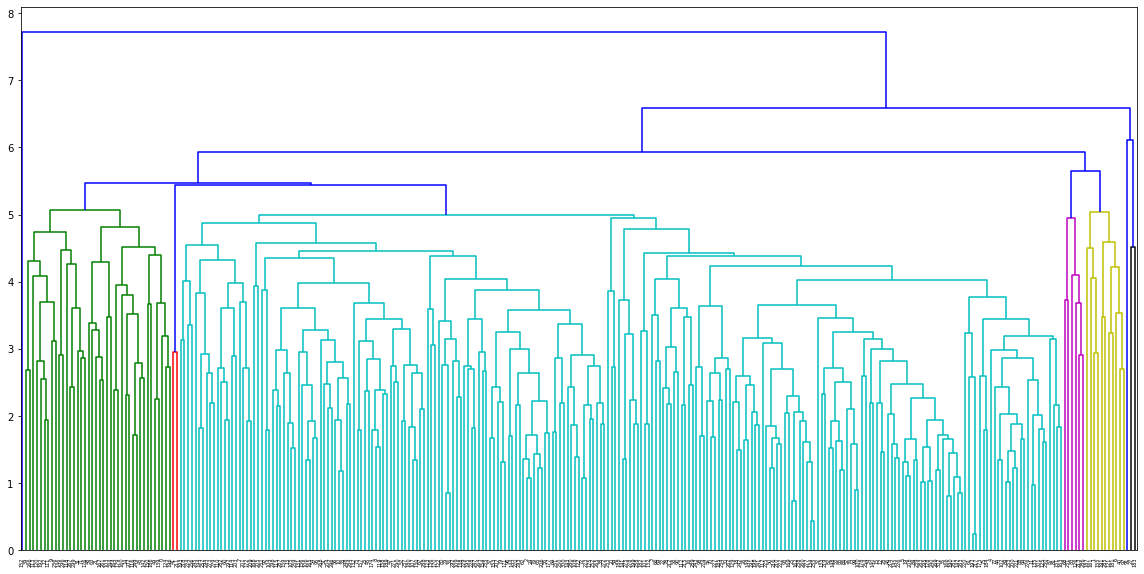

In [7]:
# Dendrogram with 'average' linkage method
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='average'))
plt.show()

The ward linkage method produces the most reasonable results, viusally. The clusters for the other two linkage methods (complete, average) have too few observations for some of their clusters.

__2) Apply agglomerative clustering to the heart disease data by setting n_clusters=2. Try the three linkage methods above and get ARI and silhouette scores for each of your solutions. Compare the results with each other and with that of the k-means solution that you implemented in the assignment of the previous checkpoint. Which algorithm and setting does perform better?__

In [8]:
# Define agglomerative clustering

#Use euclidean affinity for consistency (ward method only works with Euclidean distance)

complete_linkage = AgglomerativeClustering(
    linkage='complete',
    affinity='euclidean',
    n_clusters=2
)

average_linkage = AgglomerativeClustering(
    linkage='average',
    affinity='euclidean',
    n_clusters=2
)

ward_linkage = AgglomerativeClustering(
    linkage='ward',
    affinity='euclidean',
    n_clusters=2
)

#Fit models
complete_cluster = complete_linkage.fit_predict(X_std)
average_cluster = average_linkage.fit_predict(X_std)
ward_cluster = ward_linkage.fit_predict(X_std)

#Get scores
complete_ari = metrics.adjusted_rand_score(y, complete_cluster)
complete_sc = metrics.silhouette_score(X_std, complete_cluster, metric='euclidean')

average_ari = metrics.adjusted_rand_score(y, average_cluster)
average_sc = metrics.silhouette_score(X_std, average_cluster, metric='euclidean')


ward_ari = metrics.adjusted_rand_score(y, ward_cluster)
ward_sc = metrics.silhouette_score(X_std, ward_cluster, metric='euclidean')


print("ARI score and silhouette scores")
print("K-means (previous checkpoint): 0.44, 0.17")
print("Agglomerative(complete): {}, {})".format(complete_ari, complete_sc))
print("Agglomerative(average): {}, {})".format(average_ari, average_sc))
print("Agglomerative(ward): {}, {})".format(ward_ari, ward_sc))

ARI score and silhouette scores
K-means (previous checkpoint): 0.44, 0.17
Agglomerative(complete): -0.0010061512759301477, 0.34836188921330785)
Agglomerative(average): -0.0010061512759301477, 0.34836188921330785)
Agglomerative(ward): 0.146129913123814, 0.1387197366557222)


In [9]:
# Define agglomerative clustering

#Change affinities to cosine (other than ward)

complete_linkage = AgglomerativeClustering(
    linkage='complete',
    affinity='cosine',
    n_clusters=2
)

average_linkage = AgglomerativeClustering(
    linkage='average',
    affinity='cosine',
    n_clusters=2
)

ward_linkage = AgglomerativeClustering(
    linkage='ward',
    affinity='euclidean',
    n_clusters=2
)

#Fit models
complete_cluster = complete_linkage.fit_predict(X_std)
average_cluster = average_linkage.fit_predict(X_std)
ward_cluster = ward_linkage.fit_predict(X_std)

#Get scores
complete_ari = metrics.adjusted_rand_score(y, complete_cluster)
complete_sc = metrics.silhouette_score(X_std, complete_cluster, metric='euclidean')

average_ari = metrics.adjusted_rand_score(y, average_cluster)
average_sc = metrics.silhouette_score(X_std, average_cluster, metric='euclidean')


ward_ari = metrics.adjusted_rand_score(y, ward_cluster)
ward_sc = metrics.silhouette_score(X_std, ward_cluster, metric='euclidean')


print("ARI score and silhouette scores")
print("K-means (previous checkpoint): 0.44, 0.17")
print("Agglomerative(complete): {}, {})".format(complete_ari, complete_sc))
print("Agglomerative(average): {}, {})".format(average_ari, average_sc))
print("Agglomerative(ward): {}, {})".format(ward_ari, ward_sc))

ARI score and silhouette scores
K-means (previous checkpoint): 0.44, 0.17
Agglomerative(complete): 0.21394030618551016, 0.11730765444448985)
Agglomerative(average): 0.2940490133353465, 0.14837359969689895)
Agglomerative(ward): 0.146129913123814, 0.1387197366557222)


In [10]:
# Define agglomerative clustering

#Change affinities to manhattan (other than ward)

complete_linkage = AgglomerativeClustering(
    linkage='complete',
    affinity='manhattan',
    n_clusters=2
)

average_linkage = AgglomerativeClustering(
    linkage='average',
    affinity='manhattan',
    n_clusters=2
)

ward_linkage = AgglomerativeClustering(
    linkage='ward',
    affinity='euclidean',
    n_clusters=2
)

#Fit models
complete_cluster = complete_linkage.fit_predict(X_std)
average_cluster = average_linkage.fit_predict(X_std)
ward_cluster = ward_linkage.fit_predict(X_std)

#Get scores
complete_ari = metrics.adjusted_rand_score(y, complete_cluster)
complete_sc = metrics.silhouette_score(X_std, complete_cluster, metric='euclidean')

average_ari = metrics.adjusted_rand_score(y, average_cluster)
average_sc = metrics.silhouette_score(X_std, average_cluster, metric='euclidean')


ward_ari = metrics.adjusted_rand_score(y, ward_cluster)
ward_sc = metrics.silhouette_score(X_std, ward_cluster, metric='euclidean')


print("ARI score and silhouette scores")
print("K-means (previous checkpoint): 0.44, 0.17")
print("Agglomerative(complete): {}, {})".format(complete_ari, complete_sc))
print("Agglomerative(average): {}, {})".format(average_ari, average_sc))
print("Agglomerative(ward): {}, {})".format(ward_ari, ward_sc))

ARI score and silhouette scores
K-means (previous checkpoint): 0.44, 0.17
Agglomerative(complete): 0.3707065281378112, 0.13346005885370774)
Agglomerative(average): -0.0010061512759301477, 0.34836188921330785)
Agglomerative(ward): 0.146129913123814, 0.1387197366557222)


The ARI was the highest using the k-means solution, rather than the agglomerative clustering solutions, with a score of 0.44. However, in terms of the silhouette score, agglomerative clustering solutions came up with a score higher than that of the k-means clustering solution (0.17), for certain linkage methods and affinities. Agglomerative clustering had a high of 0.35 for silhouette score, but with a ARI of less than zero. The best performing agglomerative clustering solution was using the linkage method complete (ARI = .37, silhouette score = .13). Thus, the k-means model remains the best (ARI = .44, silhouette score = .17).